<a href="https://colab.research.google.com/github/Nidhinbc97/ML-AI/blob/main/ML_AI_CASE_STUDY_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data['Channel'].unique()

array([2, 1])

In [7]:
data['Region'].unique()

array([3, 1, 2])

In [8]:
data.drop(['Channel','Region'],axis=1,inplace=True)

Checking Outliers

<Axes: ylabel='Fresh'>

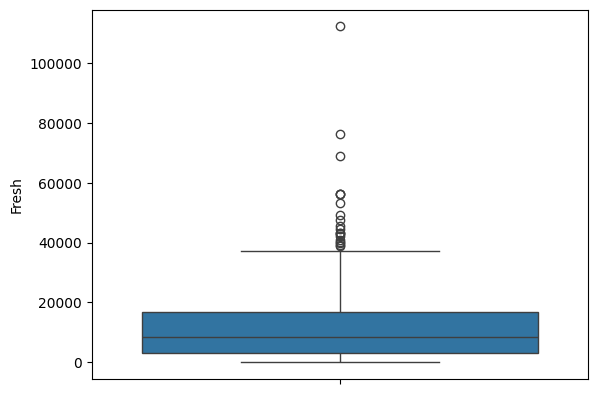

In [9]:
sns.boxplot(data['Fresh'])

<Axes: ylabel='Milk'>

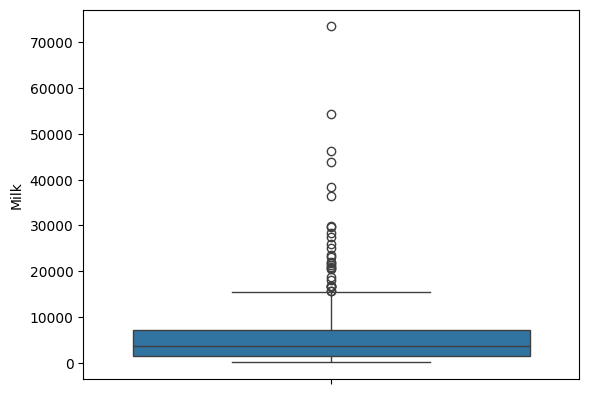

In [10]:
sns.boxplot(data['Milk'])

<Axes: ylabel='Grocery'>

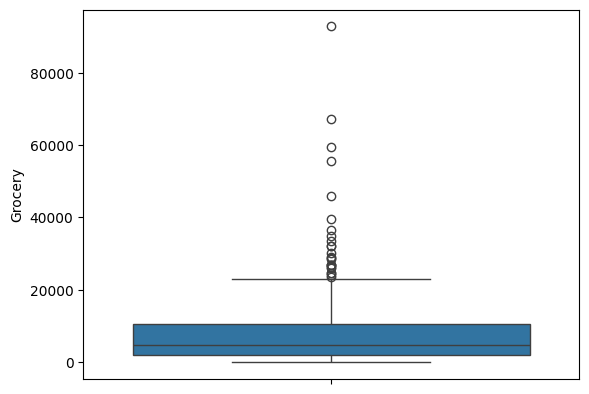

In [11]:
sns.boxplot(data['Grocery'])

<Axes: ylabel='Frozen'>

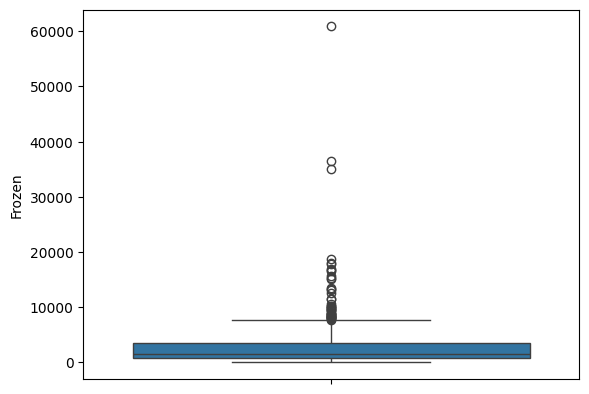

In [12]:
sns.boxplot(data['Frozen'])

<Axes: ylabel='Detergents_Paper'>

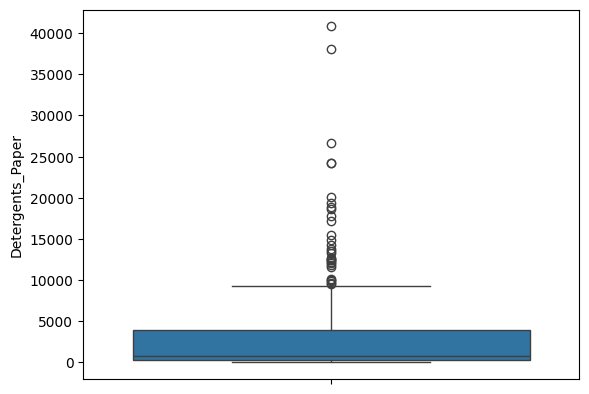

In [13]:
sns.boxplot(data['Detergents_Paper'])

<Axes: ylabel='Delicassen'>

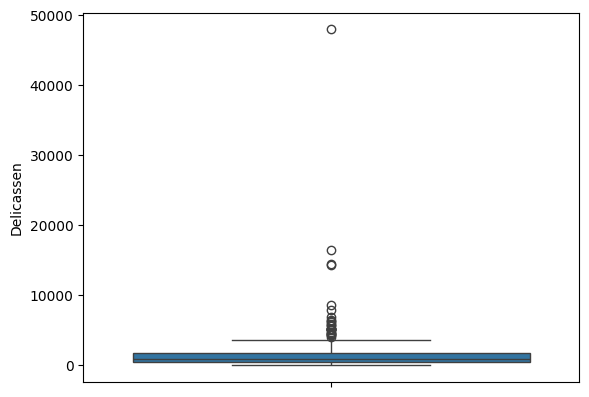

In [14]:
sns.boxplot(data['Delicassen'])

Removing Outliers

In [22]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [24]:
data_new = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [25]:
for i in data_new:
  apply_limit_imputer(data, i)

<Axes: >

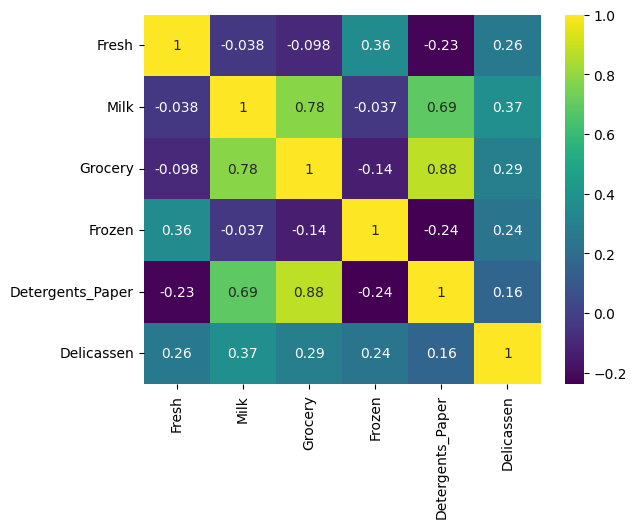

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,
						columns=data.columns)
print(scaled_data.head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.128573  1.051586  0.049267 -0.953244          0.095792    0.065892
1 -0.421627  1.086735  0.353865 -0.309735          0.306519    0.470759
2 -0.490647  0.858040  0.067935 -0.042437          0.382435    2.469440
3  0.187004 -0.879308 -0.457635  1.619962         -0.641923    0.481851
4  1.103677  0.082487 -0.005824  0.585275         -0.209575    2.469440


In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i, n_init = 10, init = 'k-means++')
  km.fit(data)
  css = km.inertia_
  wcss.append(css)

In [33]:
wcss

[80183945004.64621,
 46779052303.66911,
 29087126773.08318,
 22423106661.276447,
 19119311642.341476,
 16360160776.665535,
 14489019418.211887,
 13404571004.13864,
 12469556960.18021,
 11537002777.279621]

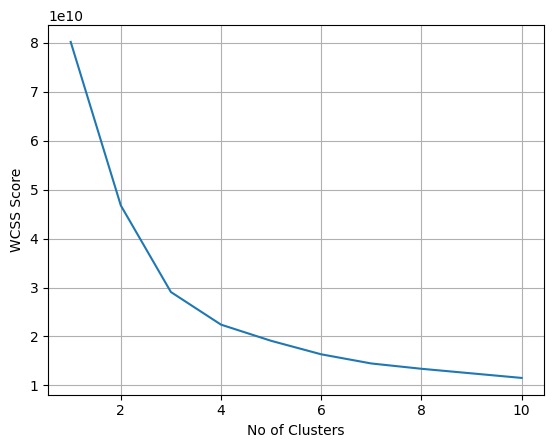

In [34]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

In [57]:
km = KMeans(n_clusters = 3,n_init = 5,init = 'k-means++')

In [58]:
km.fit(data)

KMeans(n_clusters=3, n_init=5)

In [59]:
cluster_labels = km.predict(data)

In [60]:
cluster_labels

array([0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,

In [61]:
pd.Series(cluster_labels).value_counts()

0    225
1    112
2    103
dtype: int64

In [62]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'cluster_labels'],
      dtype='object')

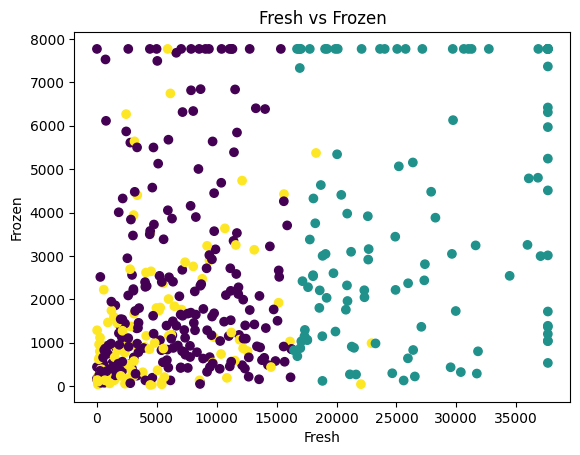

In [64]:
plt.scatter(data['Fresh'],data['Frozen'],c = cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.show()

In [65]:
cluster_indices = np.where(cluster_labels==0)

In [66]:
cluster_indices

(array([  0,   2,   3,   5,   6,   7,   8,  11,  15,  17,  19,  21,  25,
         26,  27,  31,  34,  50,  51,  55,  58,  59,  60,  62,  64,  66,
         68,  69,  72,  74,  76,  78,  79,  80,  84,  88,  90,  91,  93,
         95,  96,  97,  98,  99, 102, 104, 105, 108, 110, 113, 115, 116,
        117, 119, 121, 122, 123, 128, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 143, 146, 147, 148, 150, 151, 153, 154, 161, 162,
        164, 167, 168, 169, 172, 174, 177, 178, 179, 180, 184, 185, 186,
        191, 192, 194, 198, 199, 203, 204, 206, 207, 208, 212, 213, 219,
        220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 233, 234, 235,
        236, 238, 243, 246, 247, 248, 249, 250, 252, 254, 256, 257, 260,
        261, 263, 269, 270, 271, 272, 274, 275, 277, 278, 280, 281, 286,
        287, 288, 290, 291, 292, 295, 297, 298, 299, 308, 310, 313, 314,
        316, 317, 318, 320, 321, 322, 323, 326, 327, 329, 330, 336, 337,
        338, 339, 342, 344, 345, 348, 350, 352, 354

In [67]:
data['cluster_labels'] = cluster_labels

In [68]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,2
2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,0
4,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,1


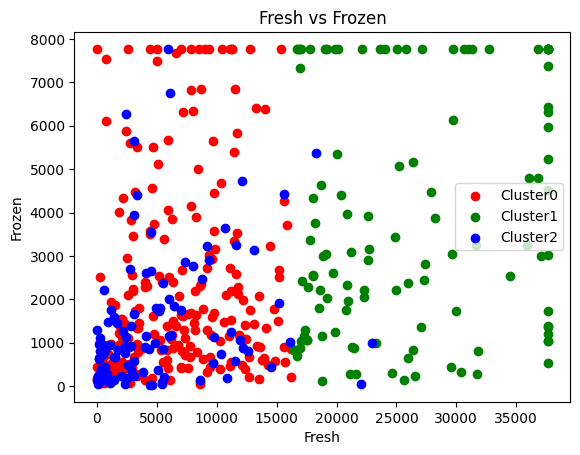

In [69]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Frozen'],
              c = colors[i],
              label = f'Cluster{i}')
  plt.xlabel('Fresh')
  plt.ylabel('Frozen')
  plt.title('Fresh vs Frozen')
  plt.legend()

AgglomerativeClustering

In [70]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [71]:
mergings = linkage(data,method='ward')

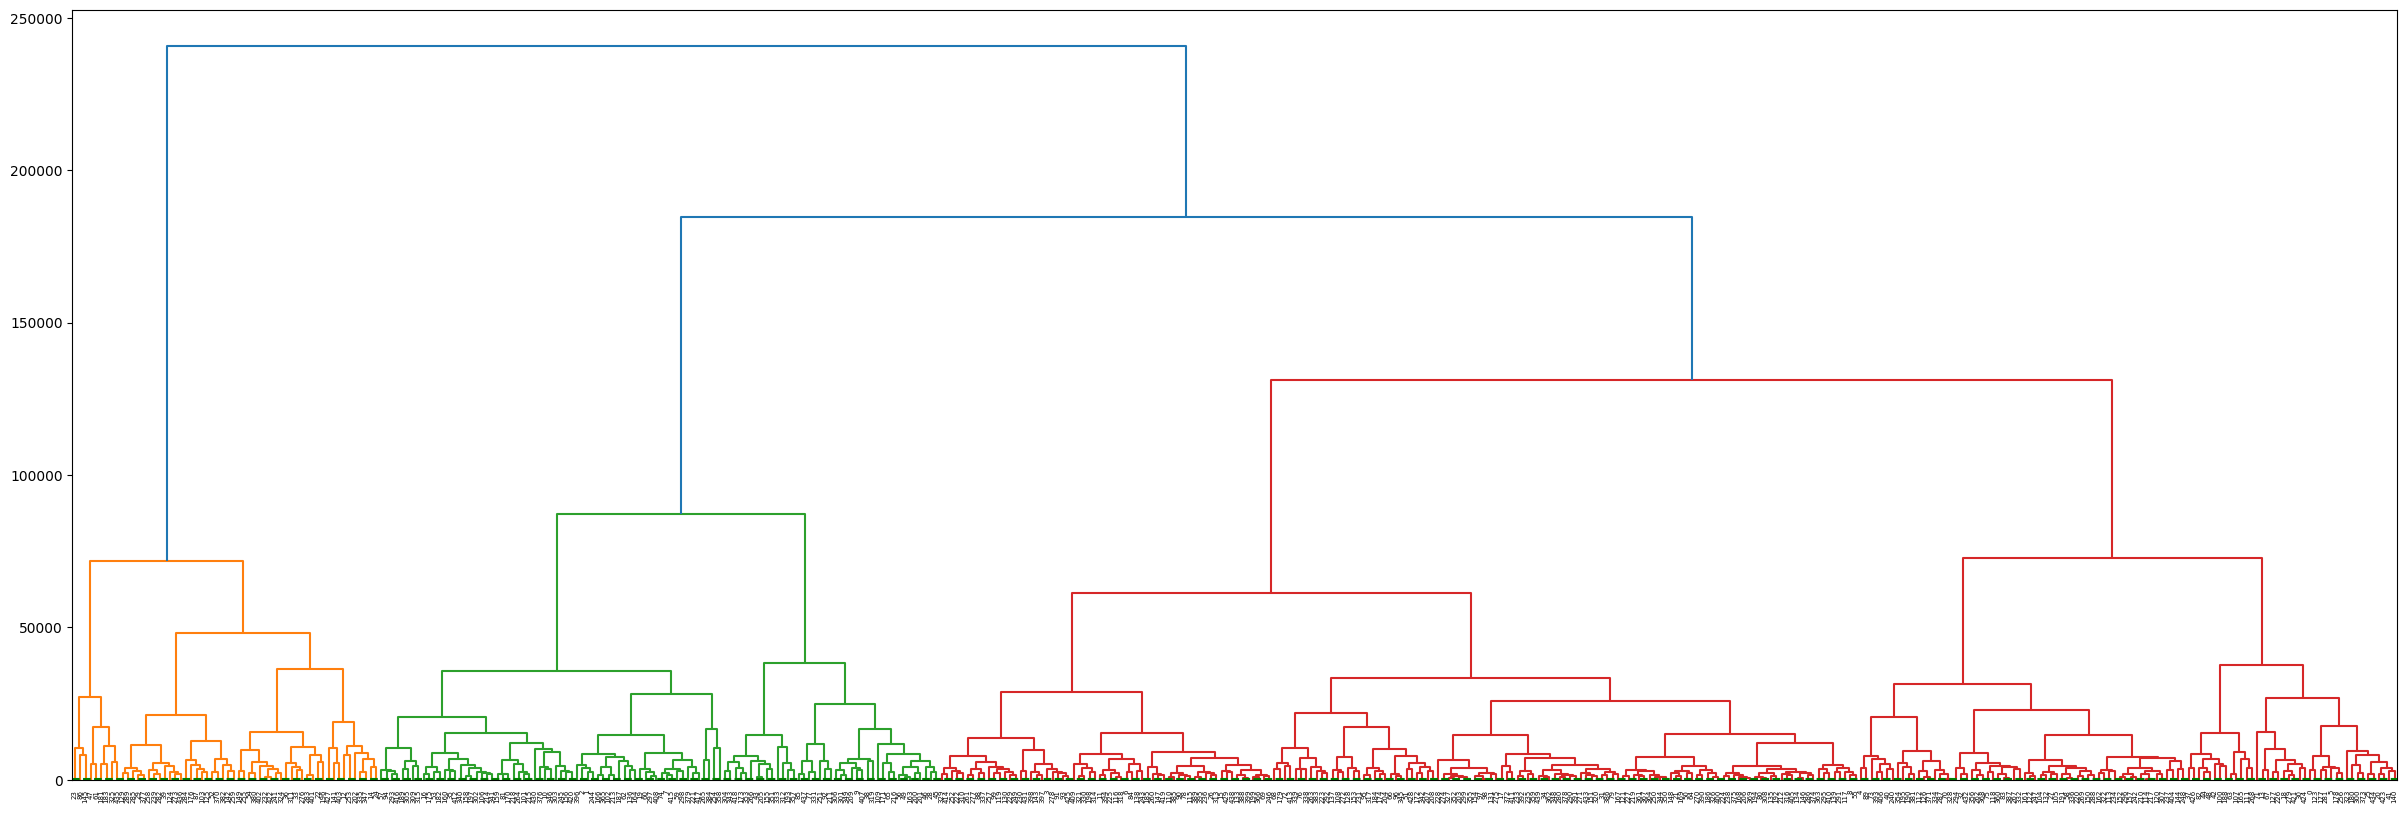

In [73]:
plt.figure(figsize=(30,10))
dendrogram(mergings)
plt.axhline(350,color='green',linestyle='--')
plt.show()

In [76]:
cluster_labels_hc = fcluster(mergings,3,criterion='maxclust')

In [77]:
cluster_labels_hc

array([3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 3, 1, 3, 2, 3, 3, 2, 3, 3,
       1, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 2, 1, 3, 2, 1, 3, 3, 3, 2,
       3, 2, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 1, 1,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       1, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 2,
       3, 3, 2, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 2, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3,

silhouette_score

In [78]:
from sklearn.metrics import silhouette_score

In [79]:
sil_score = silhouette_score(data,cluster_labels_hc)
sil_score

0.35295888600535047

In [80]:
sil_score = silhouette_score(data,cluster_labels)
sil_score

0.4116496412724229

DBSCAN Clustering

In [90]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=6)
labels = dbscan.fit_predict(data)
dbscan.fit(data)


DBSCAN(eps=1, min_samples=6)

In [91]:
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [92]:
clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
clusters

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
435,-1
436,-1
437,-1
438,-1


In [93]:
data['Clusters']=dbscan.labels_
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels,Clusters
0,12669.00,9656.0,7561.000,214.00,2674.000,1338.00,0,-1
1,7057.00,9810.0,9568.000,1762.00,3293.000,1776.00,2,-1
2,6353.00,8808.0,7684.000,2405.00,3516.000,3938.25,0,-1
3,13265.00,1196.0,4221.000,6404.00,507.000,1788.00,0,-1
4,22615.00,5410.0,7198.000,3915.00,1777.000,3938.25,1,-1
...,...,...,...,...,...,...,...,...
435,29703.00,12051.0,16027.000,7772.25,182.000,2204.00,1,-1
436,37642.75,1431.0,764.000,4510.00,93.000,2346.00,1,-1
437,14531.00,15488.0,23409.875,437.00,9419.875,1867.00,2,-1
438,10290.00,1981.0,2232.000,1038.00,168.000,2125.00,0,-1


In [94]:
labels = dbscan.fit_predict(data)


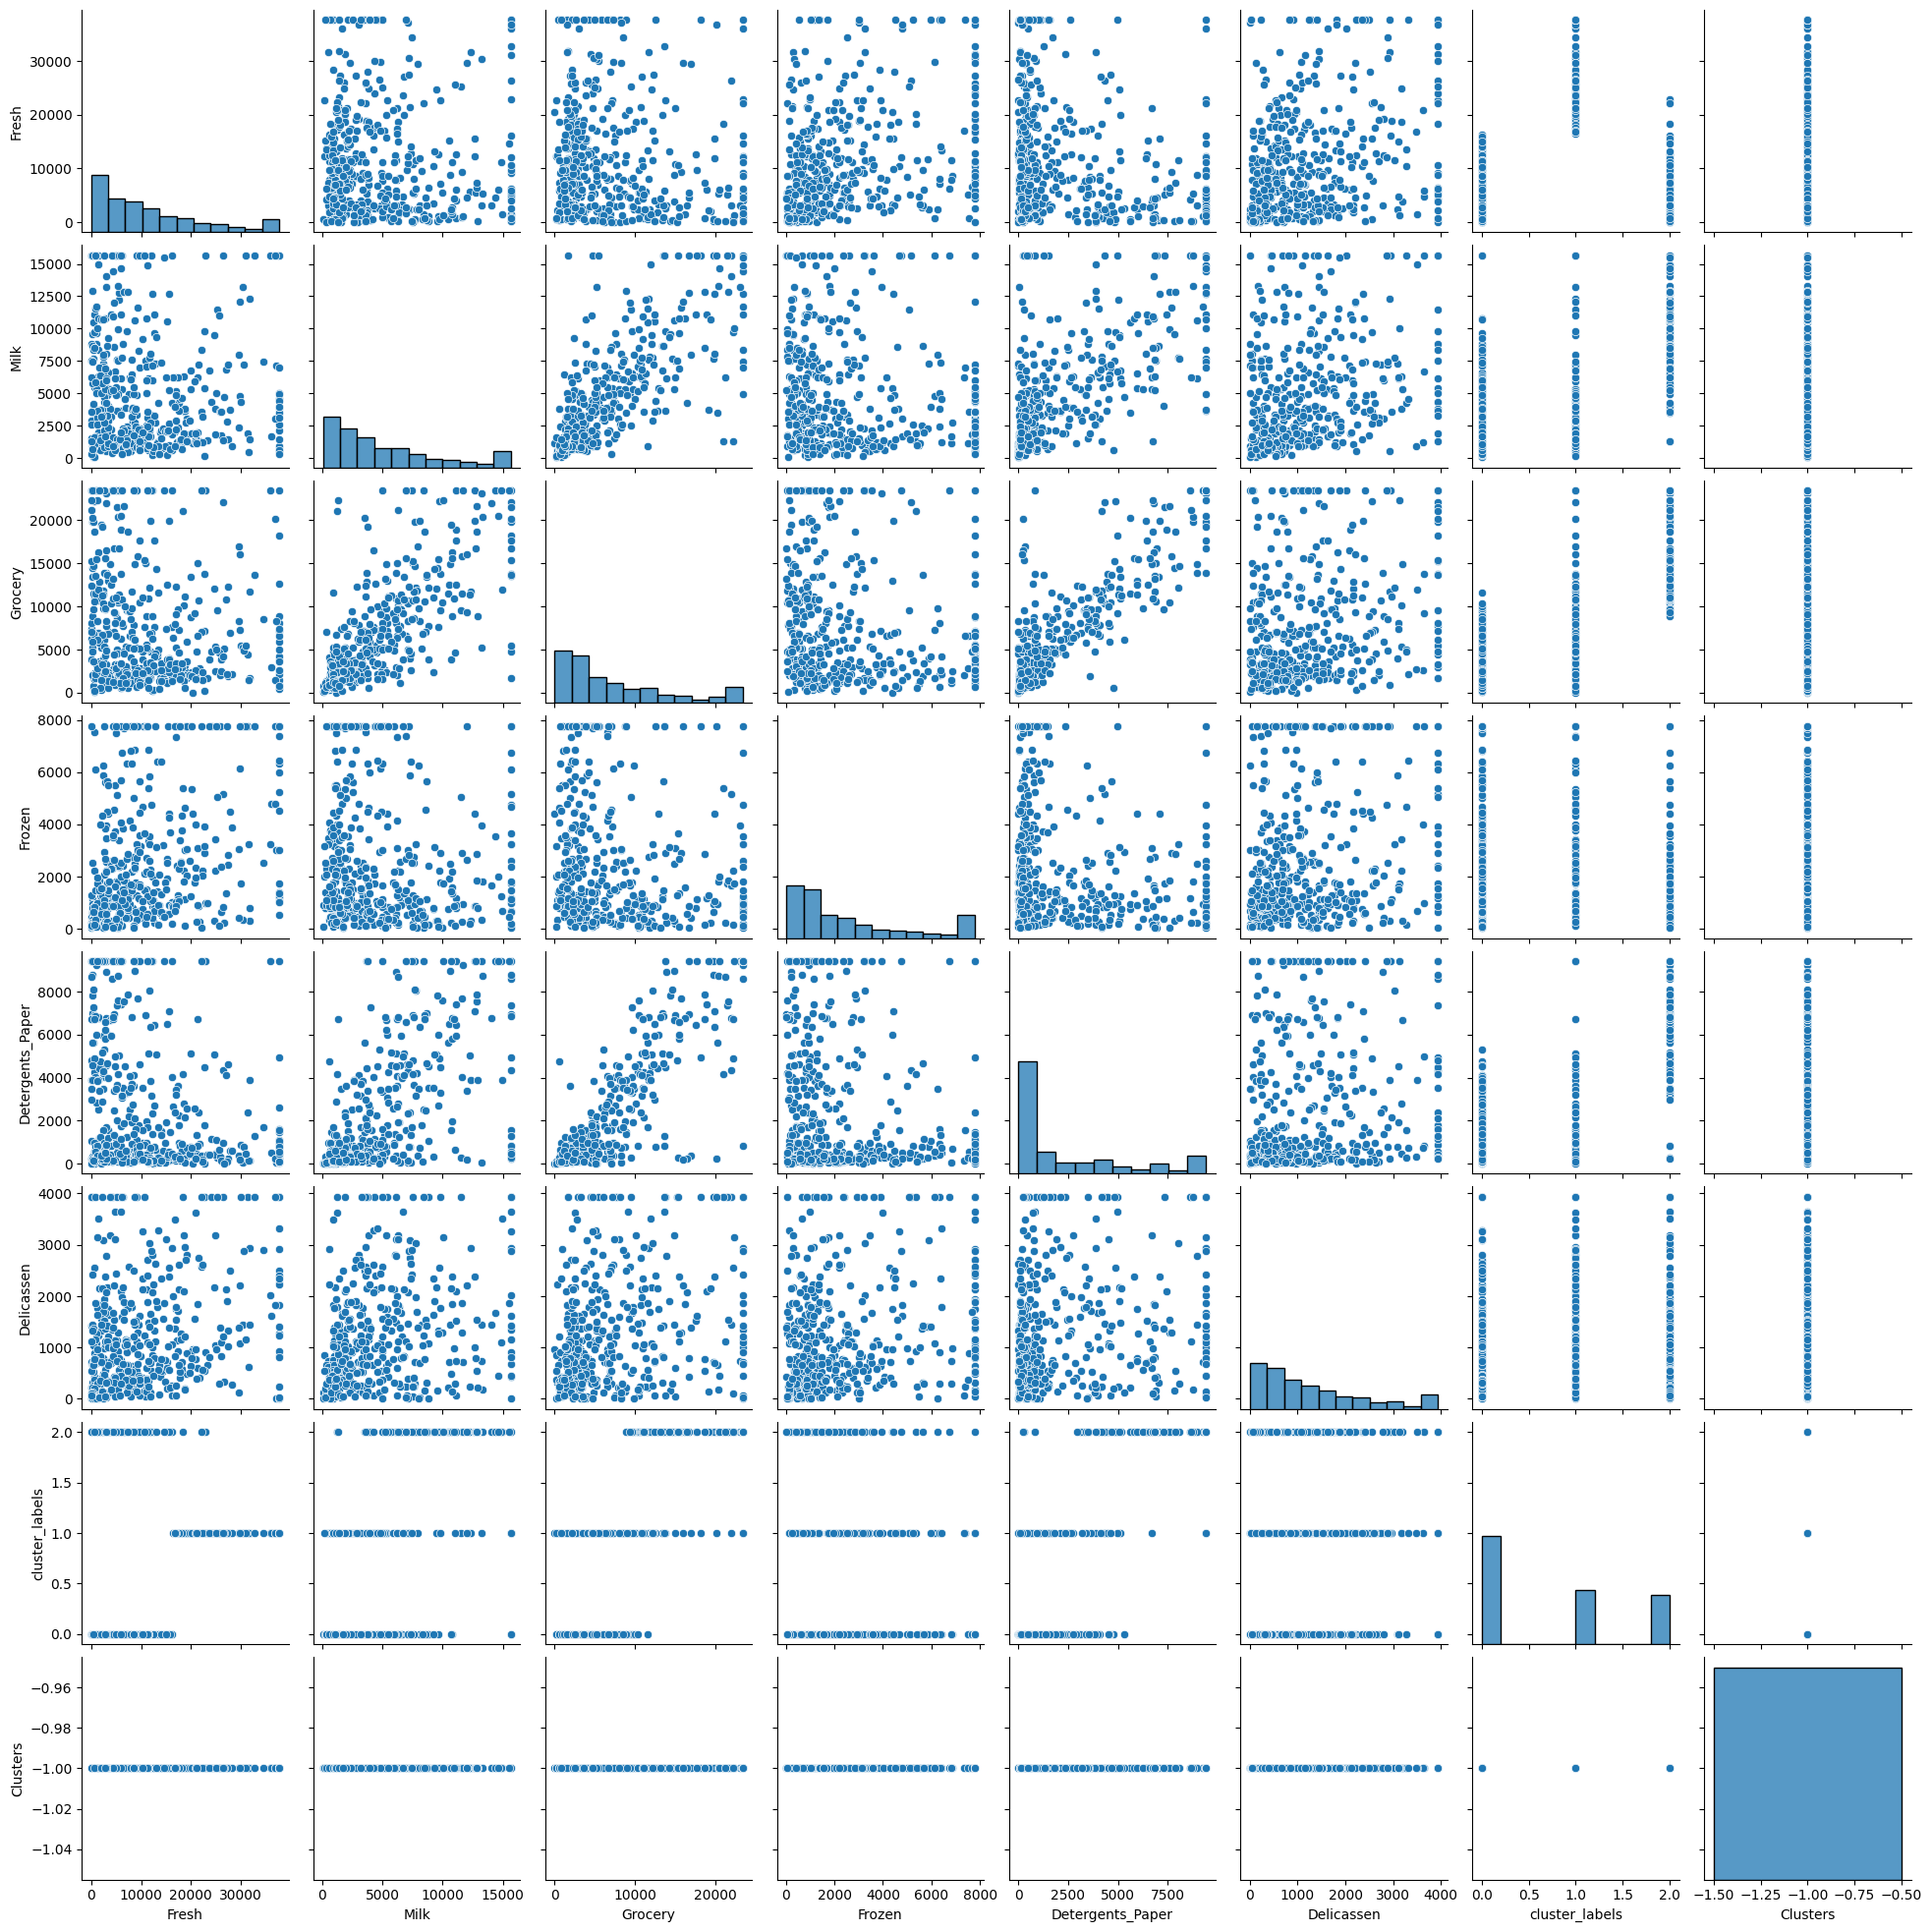

In [95]:
sns.pairplot(data)

In [96]:
data.mean()

Fresh               11357.568182
Milk                 5048.592045
Grocery              7236.375000
Frozen               2507.085795
Detergents_Paper     2392.616477
Delicassen           1266.715341
cluster_labels          0.722727
Clusters               -1.000000
dtype: float64

In [97]:
data.var()

Fresh               1.042756e+08
Milk                1.924030e+07
Grocery             4.351425e+07
Frozen              5.799898e+06
Detergents_Paper    8.648270e+06
Delicassen          1.173040e+06
cluster_labels      6.700973e-01
Clusters            0.000000e+00
dtype: float64

In [98]:
data.shape

(440, 8)

PCA

Standardization

In [99]:
from sklearn.decomposition import PCA

In [136]:
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data)

In [137]:
data_transformed = pd.DataFrame(data_transformed)

In [138]:
pca.explained_variance_

array([1.07036706e+08, 6.22261795e+07])

In [139]:
pca_array = pca.fit(data)

In [140]:
pca_array

PCA(n_components=2)

In [141]:
dbscan = DBSCAN(eps=0.5, min_samples=10)


In [142]:
labels_pca = dbscan.fit_predict(data_transformed)

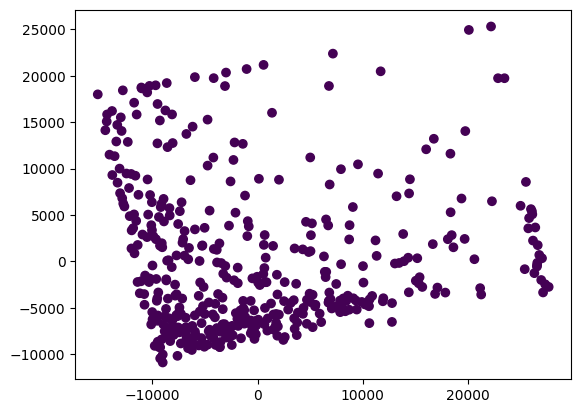

In [145]:
plt.scatter(data_transformed[0], data_transformed[1], c=labels_pca)
plt.xlabel = 'PC1'
plt.ylabel = 'PC2'
plt.show()